___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Pandas Lesson, Session - 6</p><h1>

# Missing Values & Outliers

# 1.Handling with Missing Values

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
id_no = ["P001", "P002", "P003", "P004", "P005", "P006", "P007", "P008", "P009", "P010", "P011"]
gender = ["M", "F", "M", "F", "M", "F", "M", "F", "M", "F", "M"]
status = ["FT", "PT", "-", "FT", "PT", "PT", "FT", "-", "PT", "FT", np.nan]
dept = ["DS", "FS", "AWS", "AWS", "DS", np.nan, "FS", "FS", np.nan, "DS", "AWS"]
V1 = np.array([2, 3, 5, np.nan, 7, 1, np.nan, 10, 14, "-", 6])
V2 = np.array([8, np.nan, 5, 8, 11, np.nan, np.nan, 2, 3, 7, 9])
salary = np.array([np.nan, 54, 59, 120, 58, 75, np.nan, 136, 60, 125, np.nan])

df = pd.DataFrame({
                   "id" : id_no,
                   "gender": gender,
                   "status": status,
                   "dept": dept,
                   "var1" : V1,
                   "var2" : V2,
                   "salary" : salary
                  })
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


## Type of NaN Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      11 non-null     object 
 1   gender  11 non-null     object 
 2   status  10 non-null     object 
 3   dept    9 non-null      object 
 4   var1    11 non-null     object 
 5   var2    8 non-null      float64
 6   salary  8 non-null      float64
dtypes: float64(2), object(5)
memory usage: 744.0+ bytes


In [6]:
type(np.nan)

float

In [7]:
type(np.NaN)

float

In [8]:
type(None)

NoneType

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

**What is the None keyword in Python?**

https://www.educative.io/edpresso/what-is-the-none-keyword-in-python

https://stackoverflow.com/questions/21095654/what-is-a-nonetype-object

**Difference between None and NaN in Pandas**

https://www.skytowner.com/explore/difference_between_none_and_nan_in_pandas

https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb

**Difference between np.nan and np.NaN**

https://stackoverflow.com/questions/53436339/difference-between-np-nan-and-np-nan

**Difference between nan and 'nan' in Python**

https://stackoverflow.com/questions/40309789/difference-between-nan-and-nan-in-python

https://towardsdatascience.com/navigating-the-hell-of-nans-in-python-71b12558895b

In [35]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [30]:
df_set = df.set_index('id')
df_set

,gender,status,dept,var1,var2,salary
id,,,,,,
P001,M,FT,DS,2,8.0,NaN
P002,F,PT,FS,3,NaN,54.0
P003,M,-,AWS,5,5.0,59.0
P004,F,FT,AWS,nan,8.0,120.0
P005,M,PT,DS,7,11.0,58.0
P006,F,PT,NaN,1,NaN,75.0
P007,M,FT,FS,nan,NaN,NaN
P008,F,-,FS,10,2.0,136.0
P009,M,PT,NaN,14,3.0,60.0


In [14]:
df.salary[0]

nan

In [15]:
type(df.salary[0])

numpy.float64

In [16]:
df.salary[1]

54.0

In [17]:
type(df.salary[1])

numpy.float64

In [18]:
df.status[2]

'-'

In [19]:
type(df.status[2])

str

In [23]:
df.status[10]

nan

In [32]:
df_set.loc['P011']

gender      M
status    NaN
dept      AWS
var1        6
var2        9
salary    NaN
Name: P011, dtype: object

In [34]:
df_set.iloc[10]

gender      M
status    NaN
dept      AWS
var1        6
var2        9
salary    NaN
Name: P011, dtype: object

In [21]:
type(df.status[10])

float

In [20]:
df.var1[3]

'nan'

In [21]:
type(df.var1[3])

str

In [22]:
df.var1[0]

'2'

In [23]:
type(df.var1[0])

str

## Detecting Missing Values

NaN, standing for not a number, is a numeric data type used to represent any value that is undefined or unpresentable.

For example, 0/0 is undefined as a real number and is, therefore, represented by NaN. The square root of a negative number is an imaginary number that cannot be represented as a real number, so, it is represented by NaN.

NaN is also assigned to variables, in a computation, that do not have values and have yet to be computed.

In [36]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [37]:
df.isnull()
# df.isna()

,id,gender,status,dept,var1,var2,salary
0,False,False,False,False,False,False,True
1,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,True,False,True,False
6,False,False,False,False,False,True,True
7,False,False,False,False,False,False,False
8,False,False,False,True,False,False,False
9,False,False,False,False,False,False,False


In [38]:
df.notnull()
#df.notna()

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,True,False,False
7,True,True,True,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,True,True,True


In [39]:
# columns/variables containing any missing values

df.isnull().any()

id        False
gender    False
status     True
dept       True
var1      False
var2       True
salary     True
dtype: bool

In [40]:
# rows containing any missing values

df.isnull().any(axis=1)

0      True
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8      True
9     False
10     True
dtype: bool

In [41]:
df[df.isnull().any(axis=1)]

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
8,P009,M,PT,NaN,14,3.0,60.0
10,P011,M,NaN,AWS,6,9.0,NaN


In [42]:
# rows containing full of notnull values using "~"

df[~df.isnull().any(axis = 1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [31]:
df[df.notnull().all(axis = 1)]

,id,gender,status,dept,var1,var2,salary
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
7,P008,F,-,FS,10,2.0,136.0
9,P010,F,FT,DS,-,7.0,125.0


In [32]:
# columns containing full of null values

df.isnull().all()

id        False
gender    False
status    False
dept      False
var1      False
var2      False
salary    False
dtype: bool

In [33]:
# rows containing full of null values

df.isnull().all(axis=1)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
dtype: bool

In [36]:
df[df.isnull().all(axis=1)]

,id,gender,status,dept,var1,var2,salary


In [51]:
#number of missing values in the columns

df.isnull().sum()

id        0
gender    0
status    1
dept      2
var1      0
var2      3
salary    3
dtype: int64

In [38]:
#number of missing values in the all DataFrame

df.isnull().sum().sum()

9

In [54]:
df['salary'].isnull()

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
6,P007,M,FT,FS,nan,NaN,NaN
10,P011,M,NaN,AWS,6,9.0,NaN


In [40]:
df.salary

0       NaN
1      54.0
2      59.0
3     120.0
4      58.0
5      75.0
6       NaN
7     136.0
8      60.0
9     125.0
10      NaN
Name: salary, dtype: float64

In [49]:
df.salary.isnull().any()

True

In [42]:
df.salary.isnull().sum()

3

In [56]:
# percentage of null values by columns

df.isnull().sum()/len(df)*100

id         0.000000
gender     0.000000
status     9.090909
dept      18.181818
var1       0.000000
var2      27.272727
salary    27.272727
dtype: float64

## Converting inappropriate values to NaN values

- map()
- replace()

In [57]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2,8.0,NaN
1,P002,F,PT,FS,3,NaN,54.0
2,P003,M,-,AWS,5,5.0,59.0
3,P004,F,FT,AWS,nan,8.0,120.0
4,P005,M,PT,DS,7,11.0,58.0
5,P006,F,PT,NaN,1,NaN,75.0
6,P007,M,FT,FS,nan,NaN,NaN
7,P008,F,-,FS,10,2.0,136.0
8,P009,M,PT,NaN,14,3.0,60.0
9,P010,F,FT,DS,-,7.0,125.0


In [58]:
df["var1"]

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [51]:
df["var1"].map({"-": np.nan})

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
Name: var1, dtype: float64

**Notes:** When arg is a dictionary, values in Series that are not in the dictionary (as keys) are converted to NaN. However, if the dictionary is a dict subclass that defines __missing__ (i.e. provides a method for default values), then this default is used rather than NaN.

https://www.w3resource.com/pandas/series/series-map.php#:~:text=The%20map()%20function%20is,a%20dict%20or%20a%20Series.&text=Mapping%20correspondence.&text=If%20'ignore'%2C%20propagate%20NaN,them%20to%20the%20mapping%20correspondence.

In [62]:
df["var1"].replace(to_replace="-", value=np.nan)

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9     NaN
10      6
Name: var1, dtype: object

In [63]:
type(df["var1"][0])

str

In [64]:
type(df["var1"][3])

str

In [65]:
type(df["var1"][9])

str

In [66]:
df["var1"].replace("-", np.nan).astype("float")

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [67]:
df.var1

0       2
1       3
2       5
3     nan
4       7
5       1
6     nan
7      10
8      14
9       -
10      6
Name: var1, dtype: object

In [68]:
df["var1"] = df["var1"].replace("-", np.nan).astype("float")

In [69]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [70]:
df["status"] = df["status"].replace("-", np.nan)
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [71]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [153]:
df.isnull().sum()

id        0
gender    0
status    3
dept      2
var1      3
var2      3
salary    3
dtype: int64

## Missing value handling methods

 1. <b>Deleting Rows</b> ----->if it has more than 70-75% of missing values
    
 2. <b>Replacing With Mean/Median/Mode (Imputation)</b>--->can be applied on a feature which has numeric data

 3. <b> Assigning An Unique Category</b>--->If a categorical feature has definite number of classes, we can assign another class
    
 4. <b>Predicting The Missing Values</b>---> we can predict the nulls with the help of a machine learning algorithm like linear regression

 5. <b>Using Algorithms Which Support Missing Values</b>--->KNN is a machine learning algorithm which works on the principle of distance measure.  This algorithm can be used when there are nulls present in the dataset.  KNN considers the missing values by taking the majority of the K nearest values

 ### Dropping
 
 - dropna()
 - drop()

In [72]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [73]:
# it removes the rows which contains any (at least one missing value) missing value

df.dropna(axis=0, how="any", thresh=None, inplace=False)

#how : {'any','all'}, default 'any', Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
#inplace : bool, default False, If True, do operation inplace and return None.
#thresh : Require that many non-NA values.

,id,gender,status,dept,var1,var2,salary
4,P005,M,PT,DS,7.0,11.0,58.0


In [74]:
# it removes the columns which contains any (at least one missing value) missing value

df.dropna(axis=1, how="any", thresh=None, inplace=False)

,id,gender
0,P001,M
1,P002,F
2,P003,M
3,P004,F
4,P005,M
5,P006,F
6,P007,M
7,P008,F
8,P009,M
9,P010,F


In [75]:
df.dropna(axis=1, how="all", thresh=None, inplace=False)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


* 'any' : If any NA values are present, drop that row or column.
* 'all' : If all values are NA, drop that row or column.

https://www.journaldev.com/33492/pandas-dropna-drop-null-na-values-from-dataframe

In [76]:
# let's create a column containing full of missing value

df["delete_me"] = np.nan
df

,id,gender,status,dept,var1,var2,salary,delete_me
0,P001,M,FT,DS,2.0,8.0,NaN,NaN
1,P002,F,PT,FS,3.0,NaN,54.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0,NaN
3,P004,F,FT,AWS,NaN,8.0,120.0,NaN
4,P005,M,PT,DS,7.0,11.0,58.0,NaN
5,P006,F,PT,NaN,1.0,NaN,75.0,NaN
6,P007,M,FT,FS,NaN,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0,NaN
8,P009,M,PT,NaN,14.0,3.0,60.0,NaN
9,P010,F,FT,DS,NaN,7.0,125.0,NaN


In [77]:
# now let's drop the comlumn containing full of missing value

df.dropna(axis = 1, how = "all", inplace = True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [81]:
# Keep only the columns with at least 9 non-NA values.

df.dropna(axis=1, how="any", thresh=9, inplace=False)

,id,gender,dept
0,P001,M,DS
1,P002,F,FS
2,P003,M,AWS
3,P004,F,AWS
4,P005,M,DS
5,P006,F,NaN
6,P007,M,FS
7,P008,F,FS
8,P009,M,NaN
9,P010,F,DS


thresh=N requires that a column has at least N **non-NaNs to survive.** 

https://stackoverflow.com/questions/51584906/thresh-in-dropna-for-dataframe-in-pandas-in-python/51584935

In [84]:
df.drop(index=[1, 3, 5], axis=0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0
10,P011,M,NaN,AWS,6.0,9.0,NaN


In [161]:
df.drop(columns=["id", "var1"], axis=1)

,gender,status,dept,var2,salary
0,M,FT,DS,8.0,NaN
1,F,PT,FS,NaN,54.0
2,M,NaN,AWS,5.0,59.0
3,F,FT,AWS,8.0,120.0
4,M,PT,DS,11.0,58.0
5,F,PT,NaN,NaN,75.0
6,M,FT,FS,NaN,NaN
7,F,NaN,FS,2.0,136.0
8,M,PT,NaN,3.0,60.0
9,F,FT,DS,7.0,125.0


 ### Filling (Imputation)

In [85]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


 #### a.Filling with a specific value

In [86]:
df.fillna(0)

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,0.0
1,P002,F,PT,FS,3.0,0.0,54.0
2,P003,M,0,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,0.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,0,1.0,0.0,75.0
6,P007,M,FT,FS,0.0,0.0,0.0
7,P008,F,0,FS,10.0,2.0,136.0
8,P009,M,PT,0,14.0,3.0,60.0
9,P010,F,FT,DS,0.0,7.0,125.0


In [87]:
df["var1"]

0      2.0
1      3.0
2      5.0
3      NaN
4      7.0
5      1.0
6      NaN
7     10.0
8     14.0
9      NaN
10     6.0
Name: var1, dtype: float64

In [88]:
df["var1"].fillna(0)

0      2.0
1      3.0
2      5.0
3      0.0
4      7.0
5      1.0
6      0.0
7     10.0
8     14.0
9      0.0
10     6.0
Name: var1, dtype: float64

 #### b.Filling with any Proper Value

In [89]:
df["var1"].mean()

6.0

In [167]:
df["var1"].fillna(df["var1"].mean())

0      2.0
1      3.0
2      5.0
3      6.0
4      7.0
5      1.0
6      6.0
7     10.0
8     14.0
9      6.0
10     6.0
Name: var1, dtype: float64

In [168]:
df["var1"].median()

5.5

In [169]:
df["var1"].fillna(df["var1"].median())

0      2.0
1      3.0
2      5.0
3      5.5
4      7.0
5      1.0
6      5.5
7     10.0
8     14.0
9      5.5
10     6.0
Name: var1, dtype: float64

In [170]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

In [90]:
df.fillna(df.mean())

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,NaN,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [91]:
df.fillna({"dept": "other", "var1": df.var1.mean(), "var2": df.var2.median()})

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,7.5,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,6.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,other,1.0,7.5,75.0
6,P007,M,FT,FS,6.0,7.5,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,other,14.0,3.0,60.0
9,P010,F,FT,DS,6.0,7.0,125.0


In [92]:
df.mean()[["var1", "var2"]]

var1    6.000
var2    6.625
dtype: float64

In [174]:
df.fillna(df.mean()[["var1","var2"]])

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,NaN
1,P002,F,PT,FS,3.0,6.625,54.0
2,P003,M,NaN,AWS,5.0,5.000,59.0
3,P004,F,FT,AWS,6.0,8.000,120.0
4,P005,M,PT,DS,7.0,11.000,58.0
5,P006,F,PT,NaN,1.0,6.625,75.0
6,P007,M,FT,FS,6.0,6.625,NaN
7,P008,F,NaN,FS,10.0,2.000,136.0
8,P009,M,PT,NaN,14.0,3.000,60.0
9,P010,F,FT,DS,6.0,7.000,125.0


In [95]:
pd.notna(df)

,id,gender,status,dept,var1,var2,salary
0,True,True,True,True,True,True,False
1,True,True,True,True,True,False,True
2,True,True,False,True,True,True,True
3,True,True,True,True,False,True,True
4,True,True,True,True,True,True,True
5,True,True,True,False,True,False,True
6,True,True,True,True,False,False,False
7,True,True,False,True,True,True,True
8,True,True,True,False,True,True,True
9,True,True,True,True,False,True,True


In [96]:
df.mean()

var1       6.000
var2       6.625
salary    85.875
dtype: float64

**where() Replace values where the condition is False.**

In [176]:
df.where(cond=pd.notna(df), other=df.mean(), axis = 1)

# df.where(pd.notna(df), df.mean(), axis = "columns")

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.000,85.875
1,P002,F,PT,FS,3.0,6.625,54.000
2,P003,M,NaN,AWS,5.0,5.000,59.000
3,P004,F,FT,AWS,6.0,8.000,120.000
4,P005,M,PT,DS,7.0,11.000,58.000
5,P006,F,PT,NaN,1.0,6.625,75.000
6,P007,M,FT,FS,6.0,6.625,85.875
7,P008,F,NaN,FS,10.0,2.000,136.000
8,P009,M,PT,NaN,14.0,3.000,60.000
9,P010,F,FT,DS,6.0,7.000,125.000


In [97]:
# Creating the dataframe 
df_int = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[None, 2, 54, 3, None],
                   "C":[20, 16, None, 3, 8],
                   "D":[14, 3, None, None, 6]})
  
# Print the dataframe
df_int

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,NaN,NaN
3,NaN,3.0,3.0,NaN
4,1.0,NaN,8.0,6.0


In [178]:
df_int.interpolate() # Fill NaN values using an interpolation method.

,A,B,C,D
0,12.0,NaN,20.0,14.0
1,4.0,2.0,16.0,3.0
2,5.0,54.0,9.5,4.0
3,3.0,3.0,3.0,5.0
4,1.0,3.0,8.0,6.0


https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

 #### c.Filling the Missing Values of Categorical Variables

In [179]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [99]:
df["dept"].mode()

0    AWS
1     DS
2     FS
dtype: object

In [181]:
df["dept"].mode()[0]

'AWS'

In [104]:
df["dept"].fillna(df["dept"].mode()[0])

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     AWS
6      FS
7      FS
8     AWS
9      DS
10    AWS
Name: dept, dtype: object

In [106]:
df["dept"]

0      DS
1      FS
2     AWS
3     AWS
4      DS
5     NaN
6      FS
7      FS
8     NaN
9      DS
10    AWS
Name: dept, dtype: object

In [105]:
df["dept"].fillna(method = "bfill")

0      DS
1      FS
2     AWS
3     AWS
4      DS
5      FS
6      FS
7      FS
8      DS
9      DS
10    AWS
Name: dept, dtype: object

In [109]:
df["status"]

0      FT
1      PT
2     NaN
3      FT
4      PT
5      PT
6      FT
7     NaN
8      PT
9      FT
10    NaN
Name: status, dtype: object

In [110]:
df["status"].fillna(method = "ffill")

0     FT
1     PT
2     PT
3     FT
4     PT
5     PT
6     FT
7     FT
8     PT
9     FT
10    FT
Name: status, dtype: object

 #### d.Filling by condition & by Group of the Categorical Variables 

In [111]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,NaN,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,NaN,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [113]:
df["dept"].fillna(method="ffill", inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [115]:
df.loc[df["salary"]>=100, "status"]

3     FT
7    NaN
9     FT
Name: status, dtype: object

In [188]:
df.loc[df["salary"]<100, "status"]

1     PT
2    NaN
4     PT
5     PT
8     PT
Name: status, dtype: object

In [122]:
# inplace=True didn't work

df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0], inplace=True)
df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0], inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,NaN,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,NaN,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [124]:
df.loc[df["salary"]>=100, "status"] = df.loc[df["salary"]>=100, "status"].fillna(df.loc[df["salary"]>=100, "status"].mode()[0])
df.loc[df["salary"]<100, "status"] = df.loc[df["salary"]<100, "status"].fillna(df.loc[df["salary"]<100, "status"].mode()[0])
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [191]:
df.groupby(["gender", "dept"])["status"].apply(lambda x : x.mode()[0])

gender  dept
F       AWS     FT
        DS      FT
        FS      FT
M       AWS     PT
        DS      FT
        FS      FT
Name: status, dtype: object

In [192]:
df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0])

0     FT
1     FT
2     PT
3     FT
4     FT
5     FT
6     FT
7     FT
8     FT
9     FT
10    PT
Name: status, dtype: object

In [125]:
df["status"].fillna(df.groupby(["gender", "dept"])["status"].transform(lambda x : x.mode()[0]), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,NaN
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,NaN
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [126]:
# regarding to avg of "salary" in terms of "department"

df.groupby("dept")["salary"].mean()

dept
AWS    89.500000
DS     86.000000
FS     83.333333
Name: salary, dtype: float64

In [127]:
# we transformed the values of "salary" column into group average.

df.groupby("dept")["salary"].transform("mean")  # take a look at the .transform()

0     86.000000
1     83.333333
2     89.500000
3     89.500000
4     86.000000
5     86.000000
6     83.333333
7     83.333333
8     83.333333
9     86.000000
10    89.500000
Name: salary, dtype: float64

In [128]:
df["salary"].fillna(df.groupby("dept")["salary"].transform("mean"))

0      86.000000
1      54.000000
2      59.000000
3     120.000000
4      58.000000
5      75.000000
6      83.333333
7     136.000000
8      60.000000
9     125.000000
10     89.500000
Name: salary, dtype: float64

In [129]:
#regarding to avg of "salary" in terms of "status and department"

df.groupby(["status","dept"])["salary"].mean()

status  dept
FT      AWS     120.0
        DS      125.0
        FS      136.0
PT      AWS      59.0
        DS       66.5
        FS       57.0
Name: salary, dtype: float64

In [130]:
df.groupby(["status","dept"])["salary"].transform("mean")

0     125.0
1      57.0
2      59.0
3     120.0
4      66.5
5      66.5
6     136.0
7     136.0
8      57.0
9     125.0
10     59.0
Name: salary, dtype: float64

In [131]:
df["salary"].fillna(df.groupby(["status","dept"])["salary"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,NaN,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,NaN,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,NaN,7.0,125.0


In [133]:
df.groupby(["gender","status"])["var1"].mean()

gender  status
F       FT        10.0
        PT         2.0
M       FT         2.0
        PT         8.0
Name: var1, dtype: float64

In [134]:
df.groupby(["gender","status"])["var1"].transform("mean")

0      2.0
1      2.0
2      8.0
3     10.0
4      8.0
5      2.0
6      2.0
7     10.0
8      8.0
9     10.0
10     8.0
Name: var1, dtype: float64

In [135]:
df["var1"].fillna(df.groupby(["gender","status"])["var1"].transform("mean"), inplace=True)
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,2.0,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [136]:
# cond = (df["gender"]=="M") & (df["status"]=="FT")
# cond

0      True
1     False
2     False
3     False
4     False
5     False
6      True
7     False
8     False
9     False
10    False
dtype: bool

In [137]:
# df.loc[cond, "var2"]

0    8.0
6    NaN
Name: var2, dtype: float64

In [138]:
# df.loc[cond, "var2"].fillna(df.loc[cond, "var2"].mode()[0])

0    8.0
6    8.0
Name: var2, dtype: float64

In [139]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.0,125.0
1,P002,F,PT,FS,3.0,NaN,54.0
2,P003,M,PT,AWS,5.0,5.0,59.0
3,P004,F,FT,AWS,10.0,8.0,120.0
4,P005,M,PT,DS,7.0,11.0,58.0
5,P006,F,PT,DS,1.0,NaN,75.0
6,P007,M,FT,FS,2.0,NaN,136.0
7,P008,F,FT,FS,10.0,2.0,136.0
8,P009,M,PT,FS,14.0,3.0,60.0
9,P010,F,FT,DS,10.0,7.0,125.0


In [142]:
df.groupby(["status"])["var2"].mean()

status
FT    6.25
PT    7.00
Name: var2, dtype: float64

In [143]:
df["var2"].fillna(df.groupby(["status"])["var2"].transform("mean"), inplace = True)

In [144]:
df

,id,gender,status,dept,var1,var2,salary
0,P001,M,FT,DS,2.0,8.00,125.0
1,P002,F,PT,FS,3.0,7.00,54.0
2,P003,M,PT,AWS,5.0,5.00,59.0
3,P004,F,FT,AWS,10.0,8.00,120.0
4,P005,M,PT,DS,7.0,11.00,58.0
5,P006,F,PT,DS,1.0,7.00,75.0
6,P007,M,FT,FS,2.0,6.25,136.0
7,P008,F,FT,FS,10.0,2.00,136.0
8,P009,M,PT,FS,14.0,3.00,60.0
9,P010,F,FT,DS,10.0,7.00,125.0


### filling with Interpolation

In [49]:
flights = sns.load_dataset("flights")

In [50]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [51]:
flights.isnull().sum()

year          0
month         0
passengers    0
dtype: int64

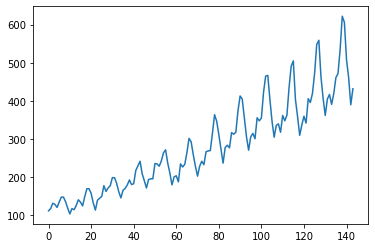

In [52]:
# you don't need to know how this plotting happens.
# just focus on the time-series line

flights.passengers.plot();

In [166]:
np.random.randint(0, 144, 20)

array([135, 113,  82, 138, 125,  82, 122,  80, 107,  24,   9,  51,  65,
       134,  49,  22,  35,  69,  84,   1])

In [173]:
flights.loc[np.random.randint(0, 144, 20), "passengers"] = None

In [174]:
flights.isnull().sum()

year           0
month          0
passengers    20
dtype: int64

In [176]:
flights.sample(10)

,year,month,passengers
137,1960,Jun,535.0
133,1960,Feb,391.0
92,1956,Sep,355.0
129,1959,Oct,407.0
141,1960,Oct,NaN
66,1954,Jul,302.0
110,1958,Mar,NaN
82,1955,Nov,237.0
16,1950,May,125.0
48,1953,Jan,196.0


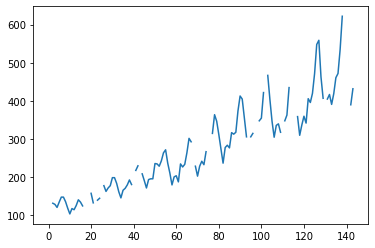

In [177]:
flights.passengers.plot();

Pandas dataframe.interpolate() function is basically used to fill NA values in the dataframe or series. But, this is a very powerful function to fill the missing values. It uses various interpolation technique to fill the missing values rather than hard-coding the value.

https://www.geeksforgeeks.org/python-pandas-dataframe-interpolate/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html

<IPython.core.display.Javascript object>

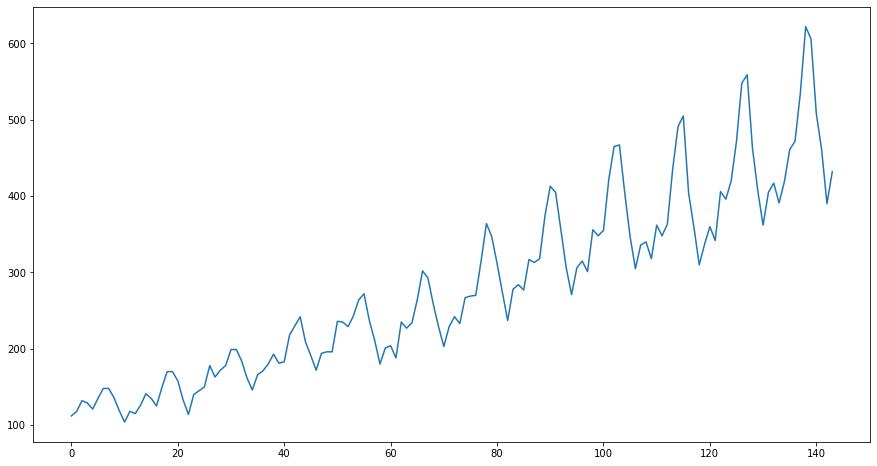

In [56]:
plt.figure(figsize = (15, 8))
flights["passengers"].interpolate().plot(kind="line");

<IPython.core.display.Javascript object>

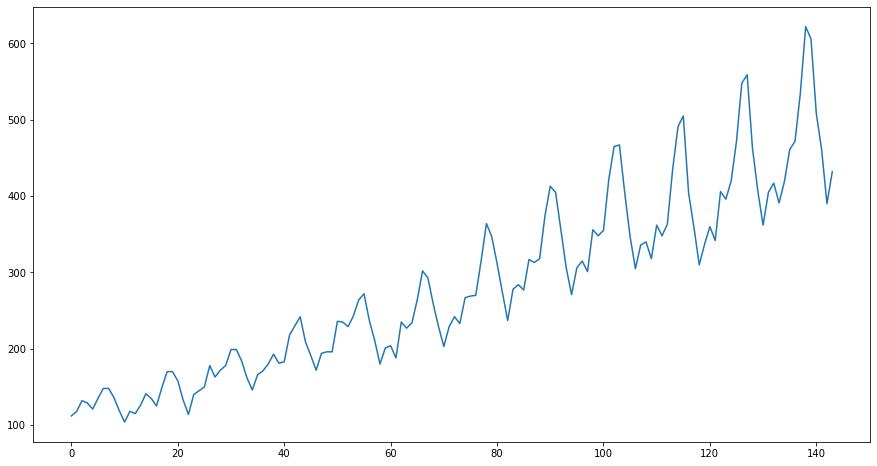

In [57]:
plt.figure(figsize = (15, 8))
flights["passengers"].fillna(method = "ffill").plot(kind="line");

 # 2.Handling with Outliers

<b>Outliers</b> are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. ... Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant. Outliers can have a disproportionate effect on statistical results, such as the mean, which can result in misleading interpretations. In this case, the mean value makes it seem that the data values are higher than they really are

### Causes of Outliers

- Data entries errors
- FirstMeasurement errors or instrument errors
- Sampling errors
- Data processing error
- Natural novelties in data

### Guideline for Handling Outliers

- A measurement error or data entry error, correct the error if possible. If you can’t fix it, remove that observation because you know it’s incorrect.
- Not a part of the population you are studying (i.e., unusual properties or conditions), you can legitimately remove the outlier.
- A natural part of the population you are studying, you should not remove it.

## Catching and Detecting Outliers

In [60]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [70]:
import seaborn as sns

df = sns.load_dataset('diamonds')
df = df.select_dtypes(include = ['float64', 'int64']) 
df = df.dropna()
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


### Graphs

<IPython.core.display.Javascript object>

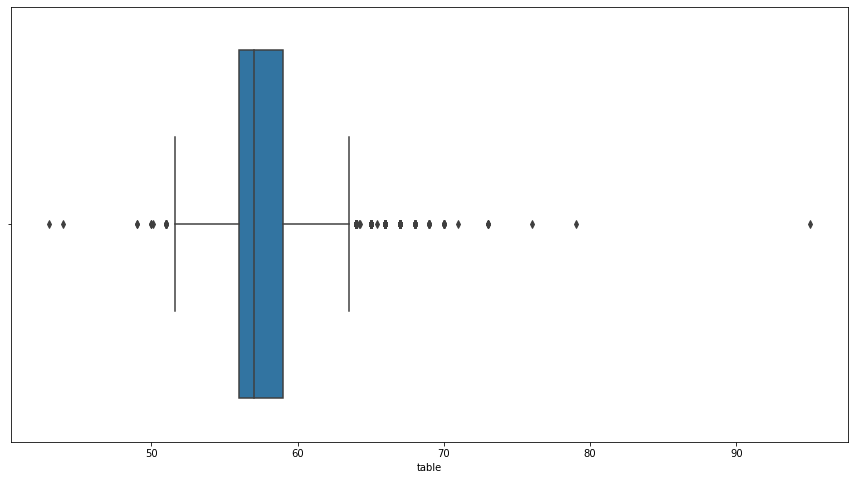

In [63]:
# you don't need to know how this plotting happens.
# just focus on quarters
# remember Statistics lesson IQR

plt.figure(figsize = (15, 8))
sns.boxplot(x = df['table']);

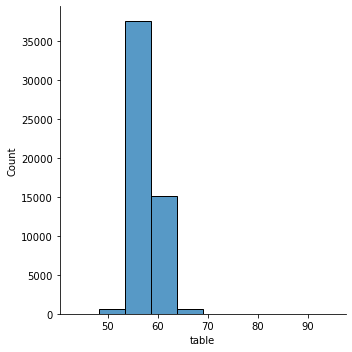

In [7]:
plt.figure(figsize = (15, 8))
sns.displot(df.table, bins = 10, kde = False);

In [71]:
df["table"]

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

### Tukey's Fences | Tukey's Rule

- First way of specifying ``Q1 & Q3`` is using the ``.quantile()`` method

In [72]:
Q1 = df["table"].quantile(0.25)
Q3 = df["table"].quantile(0.75)
IQR = Q3-Q1

In [73]:
Q1

56.0

In [74]:
Q3

59.0

In [75]:
IQR

3.0

- Second way of specifying ``Q1 & Q3`` is using the ``.describe()`` method

In [76]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [77]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [78]:
lower_lim

51.5

In [79]:
upper_lim

63.5

In [80]:
(df.table < lower_lim).value_counts()

False    53924
True        16
Name: table, dtype: int64

In [81]:
(df.table > upper_lim).value_counts()

False    53351
True       589
Name: table, dtype: int64

In [82]:
df.table[(df.table < lower_lim) | (df.table > upper_lim)].count()

605

In [83]:
df.table[~((df.table < lower_lim) | (df.table > upper_lim))].count()

53335

In [84]:
df.table[(df.table >= lower_lim) & (df.table <= upper_lim)].count()

53335

## Removing the Outliers

In [85]:
not_outliers = (df.table >= lower_lim) & (df.table <= upper_lim)
df[not_outliers][['table']]

,table
0,55.0
1,61.0
3,58.0
4,58.0
5,57.0
...,...
53935,57.0
53936,55.0
53937,60.0
53938,58.0


In [86]:
df.table[not_outliers].count()

53335

In [87]:
len(df[not_outliers])

53335

In [88]:
cleaned_df = df[not_outliers]

In [89]:
cleaned_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [90]:
 df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [92]:
outlier_index = df.loc[(df.table < lower_lim) | (df.table > upper_lim)].index
outlier_index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [32]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


<IPython.core.display.Javascript object>

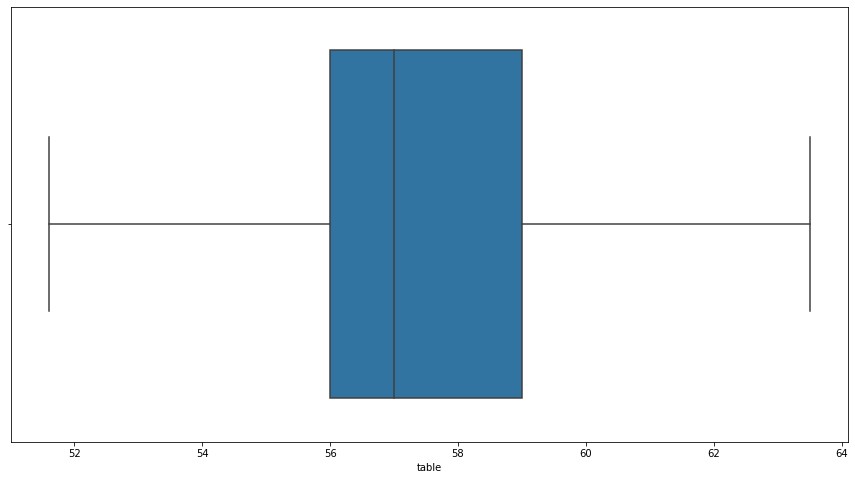

In [93]:
plt.figure(figsize = (15, 8))
sns.boxplot(x = cleaned_df.table);

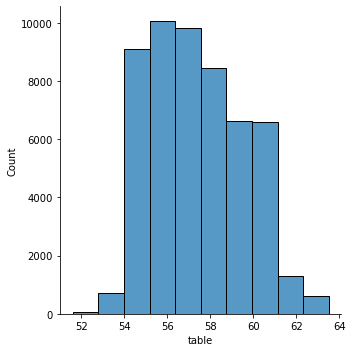

In [35]:
sns.displot(cleaned_df.table, bins = 10, kde = False);

In [36]:
cleaned_df.table.describe()

count    53335.000000
mean        57.373404
std          2.074349
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

In [37]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

## Limitation and Transformation of the Outliers

### Limitation using ``.winsorize()`` method

In [38]:
from scipy.stats.mstats import winsorize

In [39]:
df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


With winsorizing, any value of a variable above or below a percentile k on each side of the variables’ distribution is replaced with the value of the k-th percentile itself. For example, if k=5, all observations above the 95th percentile are recoded to the value of the 95th percentile, and values below the 5th percent are recoded, respectively.

https://towardsdatascience.com/detecting-and-treating-outliers-in-python-part-3-dcb54abaf7b0

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mstats.winsorize.html

In [40]:
winsorize(df.table, (0.02, 0.05))

masked_array(data=[55., 61., 61., ..., 60., 58., 55.],
             mask=False,
       fill_value=1e+20)

In many circumstances, datasets can be incomplete or tainted by the presence of invalid data. For example, a sensor may have failed to record a data, or recorded an invalid value. The numpy.ma module provides a convenient way to address this issue, by introducing masked arrays.Masked arrays are arrays that may have missing or invalid entries.

https://numpy.org/doc/stable/reference/maskedarray.generic.html#:~:text=A%20masked%20array%20is%20the%20combination%20of%20a%20standard%20numpy.&text=When%20an%20element%20of%20the,to%20be%20masked%20(invalid).

https://www.geeksforgeeks.org/numpy-maskedarray-any-function-python/

In [41]:
a = len(df.table[df.table<lower_lim])/len(df)
a

0.00029662588060808305

In [42]:
b = len(df.table[df.table>upper_lim])/len(df.table)
b

0.010919540229885057

In [ ]:
table_win = winsorize(df.table, (a, b))
table_win

<IPython.core.display.Javascript object>

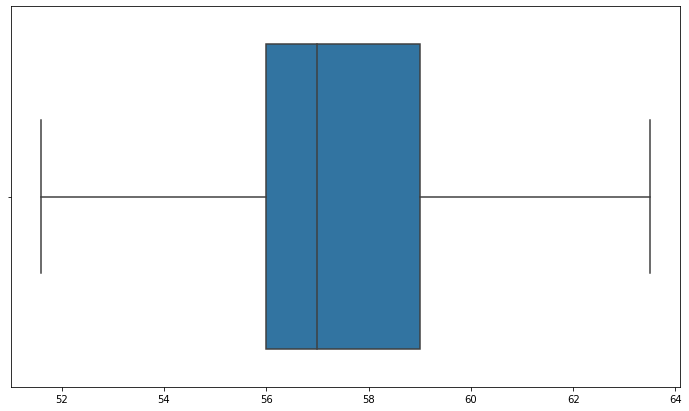

In [95]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = table_win);

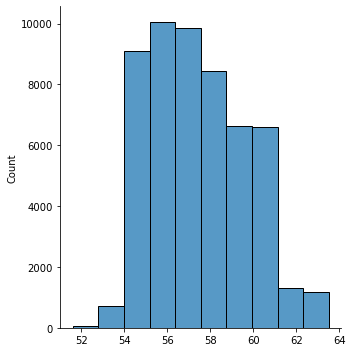

In [48]:
sns.displot(table_win, bins = 10, kde =False);

In [97]:
table_win

masked_array(data=[55. , 61. , 63.5, ..., 60. , 58. , 55. ],
             mask=False,
       fill_value=1e+20)

In [99]:
df_table_win = pd.Series(table_win)
df_table_win

<IPython.core.display.Javascript object>

0        55.0
1        61.0
2        63.5
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Length: 53940, dtype: float64

In [ ]:
df_table_win.describe()

count    53940.000000
mean        57.438591
std          2.161059
min         51.600000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
dtype: float64

In [ ]:
upper_lim, lower_lim

(63.5, 51.5)

In [ ]:
df.table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

In [100]:
df.table.sort_values().head(20)

11368    43.0
35633    44.0
5979     49.0
22701    49.0
25179    50.0
7418     50.0
3238     50.1
45798    51.0
33586    51.0
46040    51.0
26387    51.0
3979     51.0
8853     51.0
4150     51.0
1515     51.0
47630    51.0
24815    51.6
15858    52.0
25607    52.0
5144     52.0
Name: table, dtype: float64

In [102]:
df_table_win.sort_values().head(20)

11368    51.6
25179    51.6
45798    51.6
33586    51.6
46040    51.6
26387    51.6
3979     51.6
8853     51.6
35633    51.6
22701    51.6
24815    51.6
1515     51.6
5979     51.6
3238     51.6
47630    51.6
4150     51.6
7418     51.6
5144     52.0
33408    52.0
26431    52.0
dtype: float64

In [105]:
df_table_win[df_table_win == 51.6].count()

17

In [104]:
df_table_win[df_table_win == 63.5].size

590

### ``log()`` Transformation

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 0 to 53939
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 3.3 MB


In [107]:
df["carat"]

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64

<IPython.core.display.Javascript object>

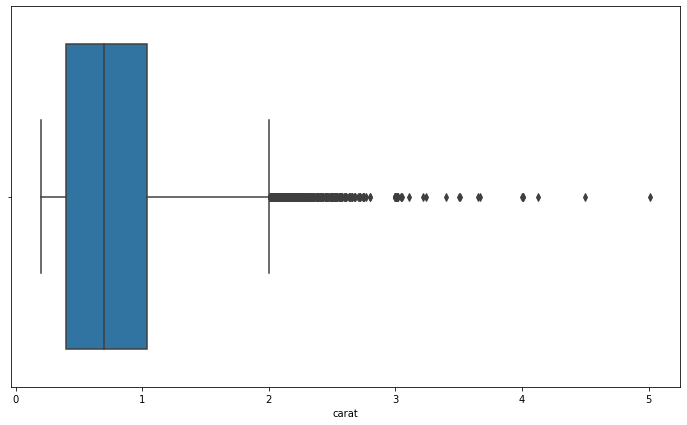

In [110]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = df.carat);

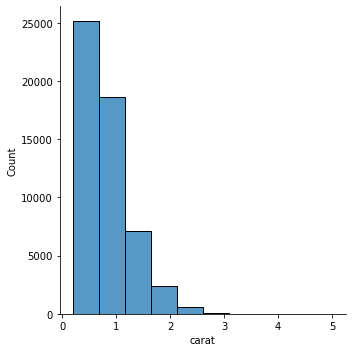

In [109]:
sns.displot(df.carat, bins = 10, kde = False);

The Numpy.log() method lets you calculate the mathematical log of any number or array.
The numpy.log() is a mathematical function that helps user to calculate Natural logarithm of x where x belongs to all the input array elements.

The natural logarithm log is the inverse of the exponential function, so that log(exp(x)) = x. The natural logarithm is logarithm in base e.

https://www.geeksforgeeks.org/numpy-log-python/#:~:text=The%20numpy.,is%20log%20in%20base%20e.

https://numpy.org/doc/stable/reference/generated/numpy.log.html

In [111]:
np.log(df.carat)

<IPython.core.display.Javascript object>

0       -1.469676
1       -1.560648
2       -1.469676
3       -1.237874
4       -1.171183
           ...   
53935   -0.328504
53936   -0.328504
53937   -0.356675
53938   -0.150823
53939   -0.287682
Name: carat, Length: 53940, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

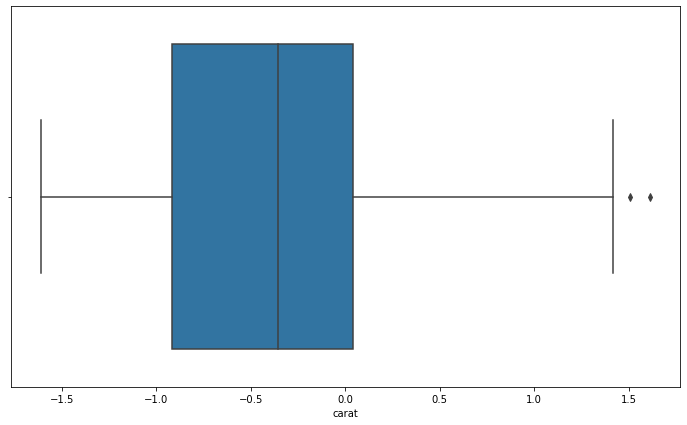

In [112]:
plt.figure(figsize = (12, 7))
sns.boxplot(x = np.log(df.carat));

<IPython.core.display.Javascript object>

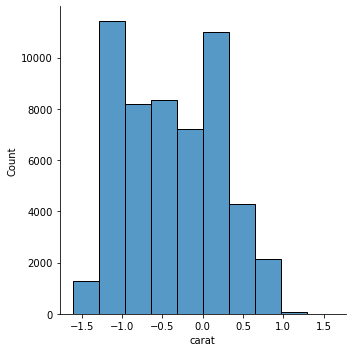

In [113]:
sns.displot(np.log(df.carat),  bins = 10, kde = False);

In [114]:
df["carat_log"] = np.log(df.carat)
df

<IPython.core.display.Javascript object>

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


### removing after log transformation

In [120]:
Q1 = df.carat_log.quantile(0.25)
Q3 = df.carat_log.quantile(0.75)
IQR = Q3-Q1

In [121]:
Q1

-0.916290731874155

In [122]:
Q3

0.03922071315328133

In [123]:
IQR

0.9555114450274363

In [124]:
lower_lim = Q1 - 1.5 * IQR
upper_lim = Q3 + 1.5 * IQR

In [125]:
lower_lim

-2.3495578994153097

In [126]:
upper_lim

1.472487880694436

In [127]:
(df.carat_log < lower_lim).value_counts()

False    53940
Name: carat_log, dtype: int64

In [128]:
(df.carat_log > upper_lim).value_counts()

False    53938
True         2
Name: carat_log, dtype: int64

In [129]:
(df.carat_log <= upper_lim).value_counts()

True     53938
False        2
Name: carat_log, dtype: int64

In [130]:
df.loc[(df.carat_log > upper_lim)]

,carat,depth,table,price,x,y,z,carat_log
27415,5.01,65.5,59.0,18018,10.74,10.54,6.98,1.611436
27630,4.50,65.8,58.0,18531,10.23,10.16,6.72,1.504077


In [131]:
outlier_index = df.loc[(df.carat_log > upper_lim)].index
outlier_index

Int64Index([27415, 27630], dtype='int64')

In [132]:
df.drop(outlier_index)

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823


In [135]:
not_outliers = (df.carat_log <= upper_lim)

In [136]:
len(df[not_outliers])

53938

In [137]:
cleaned_df = df[not_outliers]

In [138]:
cleaned_df

,carat,depth,table,price,x,y,z,carat_log
0,0.23,61.5,55.0,326,3.95,3.98,2.43,-1.469676
1,0.21,59.8,61.0,326,3.89,3.84,2.31,-1.560648
2,0.23,56.9,65.0,327,4.05,4.07,2.31,-1.469676
3,0.29,62.4,58.0,334,4.20,4.23,2.63,-1.237874
4,0.31,63.3,58.0,335,4.34,4.35,2.75,-1.171183
...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,-0.328504
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,-0.328504
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,-0.356675
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,-0.150823
